In [154]:
#importing packages required for the estimation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline


In [155]:
MSFT_units = 1000 #units of MSFT shares to hold for a month

price = yf.Ticker('MSFT') #derives the live MSFT price from yahoo

close_price_MSFT = price.history().tail(1)['Close'].iloc[0] #calling the history method on the live price to derive the last closing price

print("The most recent closing price for MSFT stock is: {}".format(close_price_MSFT))

The most recent closing price for MSFT stock is: 335.0199890136719


In [156]:
value_MSFT = MSFT_units * close_price_MSFT #investment value dervied by multiplying msft_units by the closing price of the stock

rfr_MSFT = 0.02 #four week US treasury bill rate as risk free rate

vol_MSFT = 0.2116 #30 day MSFT volatitlity

The sample mean is: -0.01463171843439525
The sample mean is: 1.0026073629743972


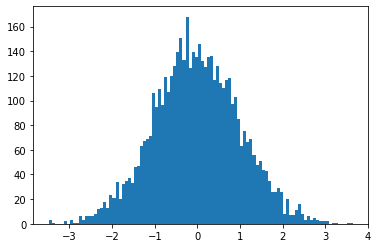

In [157]:
#defining variables required for var simulation to calculate associated risk for holding 1000 units of MSFT shares for a month

simulations = 5000

t_MSFT = 21/252 #number of trading dates in a month

sample = np.random.standard_normal(simulations) #derives random numbers shaped by the number of simulations 

plt.hist(sample, bins=100) #to visualize the random values created with a width of 100

print("The sample mean is: {}".format(sample.mean()))
print("The sample mean is: {}".format(sample.std()))

In [158]:
#calculating VaR

def VaR(pv, rfr, vol, t, simulations):
  end_value = pv * np.exp((rfr - 0.5 * vol **2)* t + np.random.standard_normal(simulations) * vol * np.sqrt(t))
  returns = end_value - pv
  return returns


In [159]:
#storing calculated VaR inside variable

returns_MSFT = VaR(value_MSFT, rfr_MSFT, vol_MSFT, t_MSFT, simulations)

In [160]:
#setting a confidence level to view VaR

x = 0.9
y = returns_MSFT[-1] #deriving the last returns MSFT value

print("VaR at {:.0%} confidence level is: ${:,.0f}".format(x,y))


VaR at 90% confidence level is: $-27,120


VaR at 90% confidence level is: $-25,760
VaR at 95% confidence level is: $-32,533
VaR at 99% confidence level is: $-45,021


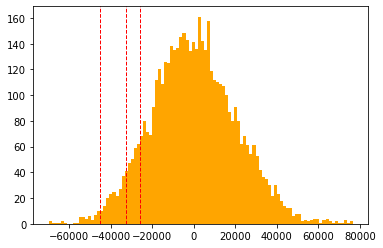

In [162]:
#plotting percentile values on histogram

plt.hist(returns_MSFT, bins=100, color = 'orange')

percentiles = [10,5,1]

#looping through percentiles to derive confidence levels
for i in percentiles:
  confidence = (100-i)/100 #to return each confidence level as a percentage
  value = np.percentile(returns_MSFT, i) #dervies and stores the VaR at each percentile 
  print("VaR at {:.0%} confidence level is: ${:,.0f}".format(confidence, value))
  plt.axvline(value, color = 'red', linestyle = 'dashed', linewidth = 1) # the axvline method plots a dashed line on the percentile returns_MSFT values derived